In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline, exp_range, \
    validation_curve_with_undersampling, plot_validation_curve_with_undersampling, fit_and_score_iteratively, \
    plot_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, KFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC


In [2]:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)[:10000]
    X_test = np.load(f2)
    y_train = np.load(f3)[:10000]
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)[:10000]
    y_test_ohe = np.load(f6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_ohe.shape, y_test_ohe.shape)


(10000, 784) (10000, 784) (10000, 1) (10000, 1) (10000, 10) (10000, 10)


In [6]:
# No ohe on output
classifier = SVC()
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train,
                                                X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

print(train_res, test_res)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9851 0.9594


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

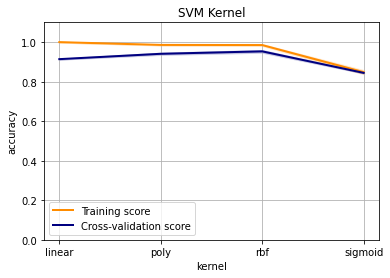

In [28]:
# optimize kernal

# regularization_param = 1
# # kernal = 'rbf' #{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
# degree = 3 # polynormal kernal degree, ignored by all other kernals, default=3
# gamma = 'scale' # gamma{‘scale’, ‘auto’} or float, default=’scale’
# coef0 = 0.0 # float, Independent term in kernel function. Only significant in ‘poly’ and ‘sigmoid’. default=0.0
# # shrinkingbool, default=True
# # probabilitybool, default=False
# # tolfloat, default=1e-3 Tolerance for stopping criterion.
# max_iter = -1 #int, default=-1
# random_state = 0 #int default= None
classifier = SVC()

cv = KFold(n_splits=2, shuffle=True, random_state=0)

param_range = ('linear', 'poly', 'rbf', 'sigmoid')

train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='kernel', param_range=param_range,
                      cv=cv, is_log_axis=False, scoring='accuracy', n_jobs=8, title='SVM Kernel')


In [29]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

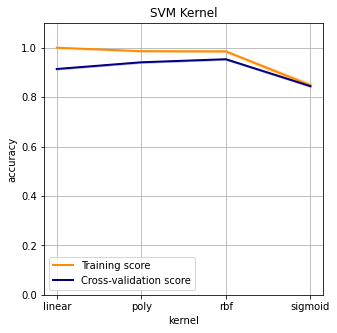

In [30]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='SVM Kernel',
            scoring='accuracy', is_log_axis=False, 
            figsize=(5,5), param_name='kernel')

In [31]:
# Model performance with rbf kernel
classifier = SVC(kernel='rbf')
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

print(train_res, test_res)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9851 0.9594


In [35]:
# Model performance with poly degree=2 performance
classifier = SVC(kernel='poly', degree=2)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

print(train_res, test_res)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9844 0.9569


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

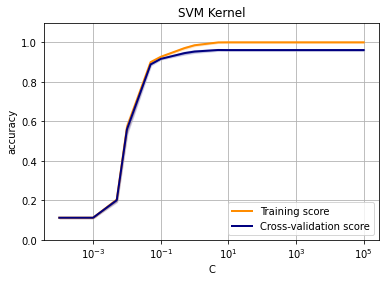

In [18]:
# optimize C

regularization_param = [1e-4, 5e-3, 1e-3, 5e-2, 1e-2, 5e-1, 1e-1, 5e-0, 1e0, 
                       5e0, 1e1, 5e1, 1e2, 5e2, 1e3, 1e3, 1e4, 5e4, 1e5]
regularization_param.sort()
# # kernal = 'rbf' #{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
# degree = 3 # polynormal kernal degree, ignored by all other kernals, default=3
# gamma = 'scale' # gamma{‘scale’, ‘auto’} or float, default=’scale’
# coef0 = 0.0 # float, Independent term in kernel function. Only significant in ‘poly’ and ‘sigmoid’. default=0.0
# # shrinkingbool, default=True
# # probabilitybool, default=False
# # tolfloat, default=1e-3 Tolerance for stopping criterion.
# max_iter = -1 #int, default=-1
# random_state = 0 #int default= None
classifier = SVC(kernel='rbf')

cv = KFold(n_splits=2, shuffle=True, random_state=0)

param_range = regularization_param

train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='C', param_range=param_range,
                      cv=cv, is_log_axis=True, scoring='accuracy', n_jobs=8, title='SVM Kernel')


In [19]:
labeled_test

array([[1.000e-04, 1.127e-01],
       [1.000e-03, 1.127e-01],
       [5.000e-03, 2.014e-01],
       [1.000e-02, 5.596e-01],
       [5.000e-02, 8.882e-01],
       [1.000e-01, 9.162e-01],
       [5.000e-01, 9.453e-01],
       [1.000e+00, 9.534e-01],
       [5.000e+00, 9.613e-01],
       [5.000e+00, 9.613e-01],
       [1.000e+01, 9.609e-01],
       [5.000e+01, 9.609e-01],
       [1.000e+02, 9.609e-01],
       [5.000e+02, 9.609e-01],
       [1.000e+03, 9.609e-01],
       [1.000e+03, 9.609e-01],
       [1.000e+04, 9.609e-01],
       [5.000e+04, 9.609e-01],
       [1.000e+05, 9.609e-01]])

In [20]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

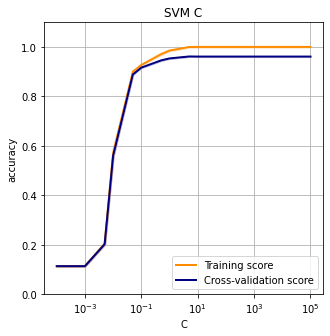

In [23]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='SVM C',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5), param_name='C')

In [27]:
# Model performance at 250 estimators
classifier = SVC(kernel='rbf', C=5)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

print(train_res, test_res)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9994 0.9679


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

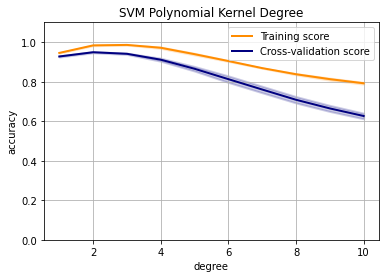

In [36]:
# Polynomial degree optimization
# optimize degrees

regularization_param = range(1, 11)
classifier = SVC(kernel='poly')

cv = KFold(n_splits=2, shuffle=True, random_state=0)

param_range = regularization_param

train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='degree', param_range=param_range,
                      cv=cv, is_log_axis=False, scoring='accuracy', n_jobs=8, title='SVM Polynomial Kernel Degree')



In [37]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

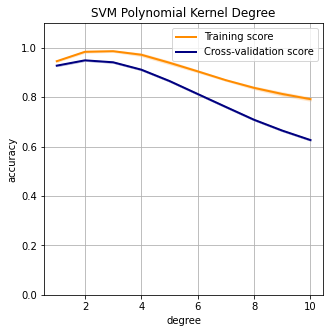

In [38]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='SVM Polynomial Kernel Degree',
            scoring='accuracy', is_log_axis=False, 
            figsize=(5,5), param_name='degree')

# Learning Curves

iteration 1


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

{'train_sizes': array([ 466,  933, 1399, 1866, 2333, 2799, 3266, 3732, 4199, 4666]), 'train_scores_mean': array([1.        , 1.        , 1.        , 1.        , 0.99985712,
       0.99988091, 0.99989794, 0.99982136, 0.99984123, 0.99971424]), 'train_scores_std': array([0.        , 0.        , 0.        , 0.        , 0.00020206,
       0.00016842, 0.00014434, 0.00012631, 0.00011227, 0.00010103]), 'test_scores_mean': array([0.90100055, 0.92514318, 0.93685706, 0.94328581, 0.94957114,
       0.95142837, 0.95485663, 0.95857108, 0.96057118, 0.96199971]), 'test_scores_std': array([0.00275746, 0.00482314, 0.00146063, 0.00579568, 0.00543941,
       0.00398254, 0.00598737, 0.00470267, 0.00471043, 0.00510177]), 'fit_times_mean': array([0.07844464, 0.18057354, 0.34833749, 0.69022759, 1.24044029,
       1.65238937, 1.9502937 , 3.30317275, 3.85725967, 4.53102438]), 'fit_times_std': array([0.00930957, 0.01381035, 0.03574983, 0.26948286, 0.60226469,
       0.65547175, 0.29669795, 0.38848675, 0.11947456

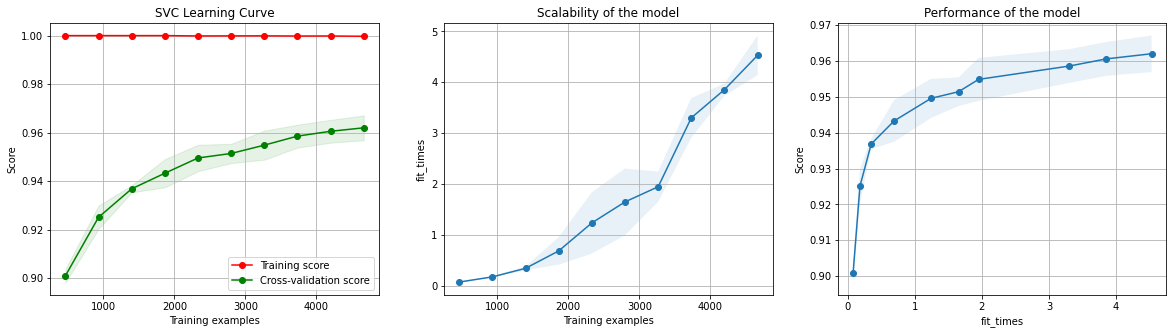

In [3]:
classifier = SVC(kernel='rbf', C=5)
cv = KFold(n_splits=3, shuffle=True, random_state=0)

title = 'SVC Learning Curve'
results = plot_learning_curve(classifier, title, X_train, y_train, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)
print(results)